In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# os.getcwd()

media_helth= pd.read_csv("mental_health_social_media_dataset.csv")
media_helth['date']=pd.to_datetime(media_helth['date'])
media_helth.head(5)




,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,2024-01-01,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,2024-01-12,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,2024-01-06,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,2024-01-17,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,2024-01-28,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [20]:
media_helth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   person_name                  5000 non-null   object        
 1   age                          5000 non-null   int64         
 2   date                         5000 non-null   datetime64[ns]
 3   gender                       5000 non-null   object        
 4   platform                     5000 non-null   object        
 5   daily_screen_time_min        5000 non-null   int64         
 6   social_media_time_min        5000 non-null   int64         
 7   negative_interactions_count  5000 non-null   int64         
 8   positive_interactions_count  5000 non-null   int64         
 9   sleep_hours                  5000 non-null   float64       
 10  physical_activity_min        5000 non-null   int64         
 11  anxiety_level                5000 non-null 

In [21]:
media_helth.columns

Index(['person_name', 'age', 'date', 'gender', 'platform',
       'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level',
       'mood_level', 'mental_state'],
      dtype='object')

In [22]:
media_helth['person_name'].is_unique

False

In [23]:
media_helth.isna().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

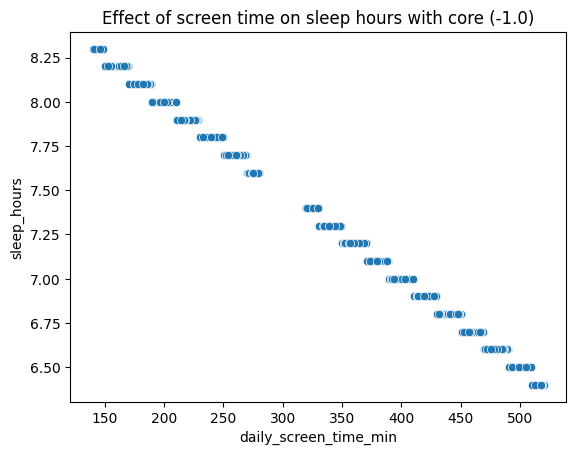

In [24]:
corr = media_helth["daily_screen_time_min"].corr(
    media_helth["sleep_hours"],
    method="pearson"
)

sns.scatterplot(x="daily_screen_time_min", y="sleep_hours", data=media_helth)
plt.title(f"Effect of screen time on sleep hours with core ({np.round(corr, 2)})")
plt.show()


/var/folders/v3/xl0j_84577n22dbwg0l6txvw0000gn/T/ipykernel_45447/781783938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="social_media_time_min", data=media_helth, palette="pastel")


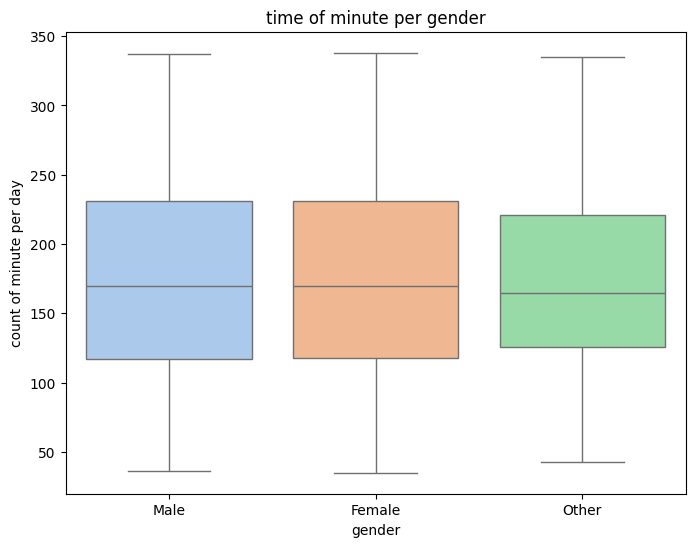

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x="gender", y="social_media_time_min", data=media_helth, palette="pastel")
plt.title("time of minute per gender")
plt.xlabel("gender")
plt.ylabel("count of minute per day")
plt.show()

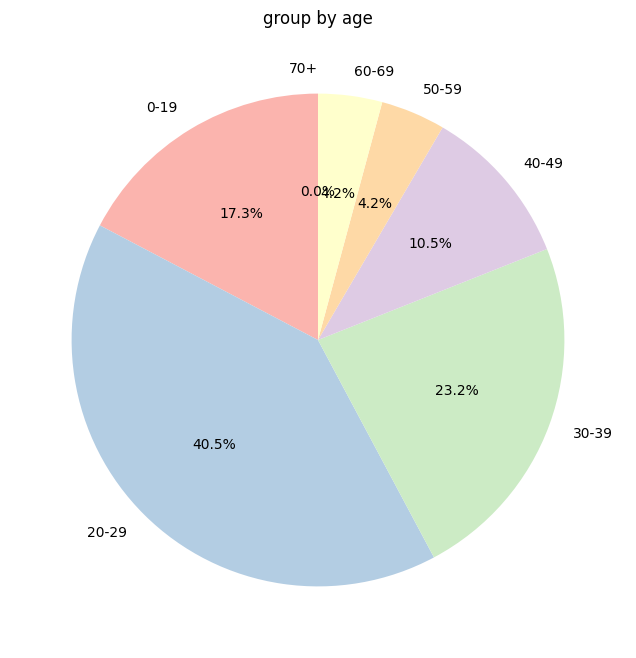

In [26]:
# group_age= media_helth.groupby("age")["social_media_time_min"]


# ניצור קבוצות גיל
bins = [0, 19, 29, 39, 49, 59, 69, 120]  # גבולות הקבוצות
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

media_helth['age_group'] = pd.cut(media_helth['age'], bins=bins, labels=labels, right=True)

# סיכום מספר האנשים בכל קבוצת גיל
age_counts = media_helth['age_group'].value_counts().sort_index()

# ציור Pie Chart
plt.figure(figsize=(8,8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("group by age")
plt.show()


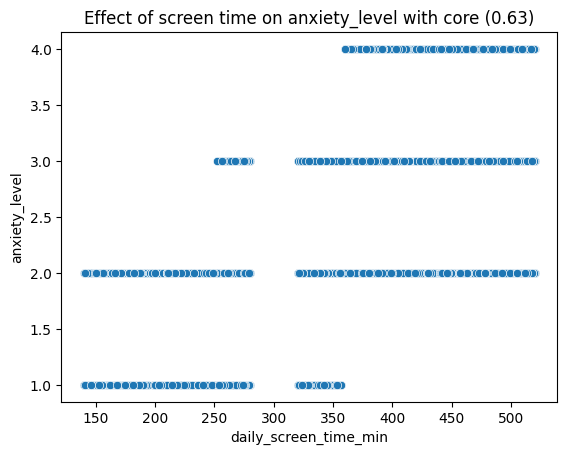

In [27]:
corr = media_helth["daily_screen_time_min"].corr(
    media_helth["anxiety_level"],
    method="pearson"
)

sns.scatterplot(x="daily_screen_time_min", y="anxiety_level", data=media_helth)
plt.title(f"Effect of screen time on anxiety_level with core ({np.round(corr, 2)})")
plt.show()

In [28]:
media_helth[['person_name','age','age_group']]

,person_name,age,age_group
0,Reyansh Ghosh,35,30-39
1,Neha Patel,24,20-29
2,Ananya Naidu,26,20-29
3,Neha Das,66,60-69
4,Reyansh Banerjee,31,30-39
...,...,...,...
4995,Sai Menon,42,40-49
4996,Neha Ansari,33,30-39
4997,Aarav Sharma,13,0-19
4998,Aadhya Patil,21,20-29


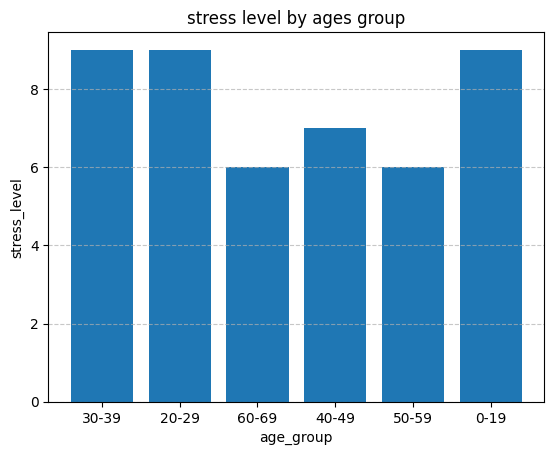

In [29]:
plt.bar(media_helth["age_group"], media_helth["stress_level"])
plt.title("stress level by ages group")
plt.xlabel("age_group")
plt.ylabel("stress_level")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# for i, value in enumerate(media_helth["social_media_time_min"]):
#     plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()